# Importing the libraries

In [32]:
# https://www.kaggle.com/code/shohanursobuj/diabetes-prediction-oversampling-acc-90-47

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from pandas_profiling import ProfileReport

import ydata_profiling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

# para a análise exploratória
import datetime as dt


Fazer aqui o código que coleta os dados brutos para tratamento

In [ ]:
#!pip install pandas_profiling

In [ ]:
# carregar tabela
# tratar e organiza os dados
# criar as variáveis com os dados a serem analizasdos

# Loading the dataset

In [33]:
from pathlib import Path
import traceback

path = 'diabetes_binary_health_indicators_BRFSS2015.csv'

try:
    if Path(path).is_file():
        print('Local')
        df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
    else:
        print('Remota')
        df = pd.read_csv('https://raw.githubusercontent.com/cedmenezes/estudos/main/diabetes_binary_health_indicators_BRFSS2015.csv')

except Exception:
        traceback.print_exc()


Remota


# Exploratory data analysis

In [24]:
# necessário pip install ipywidgets
#from pandas_profiling import ProfileReport
#import ydata_profiling

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# returns the top 5 rows of the dataset
df.head() 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
# returns the last 5 rows of the dataset
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [7]:
# returns the number of rows and columns of the dataset
df.shape

(253680, 22)

In [8]:
# returns the name of all columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
# checking the number of missing values in the daataset
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [34]:
# Handling missing values 
# removing the rows having missing values

df.dropna(inplace = True)

In [36]:
# Checking duplicates

duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [37]:
# Removing duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [38]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


# Over Sampling

In [39]:
# in our dataset the label is diabetes column

# This will return the label distribution count 
df['Diabetes_binary'].value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

<Axes: title={'center': 'Label Distribution'}>

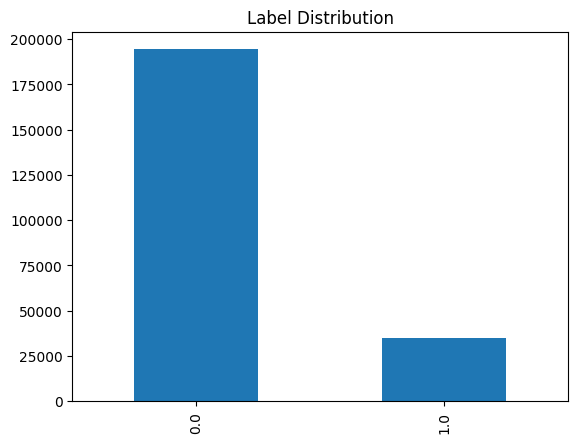

In [40]:
# plotting the label distribution
df['Diabetes_binary'].value_counts().plot(kind = 'bar', title = 'Label Distribution')


As you can see the dataset is imbalanced, we need to balance it in order to get a better model.


<Axes: title={'center': 'Label Distribution after Oversampling'}>

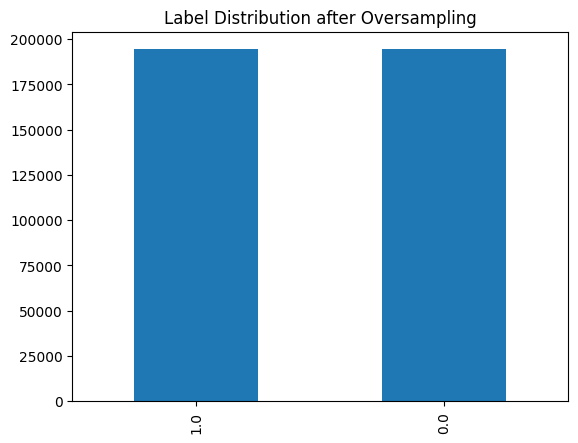

In [41]:
# over sampling of the dataset to get a balanced dataset
class_0 = df[df['Diabetes_binary'] == 0]
class_1 = df[df['Diabetes_binary'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
df_new = pd.concat([class_1_over, class_0], axis=0)

# plotting the new label distribution
df_new['Diabetes_binary'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

# Splitting dataset to train and test

In [42]:
X = df_new.drop('Diabetes_binary', axis = 1) # features
y = df_new[['Diabetes_binary']] # labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10)

# *Fitting machine learning models*

## 1. Random Forest Classifier

In [22]:
# Initializing the model - RFC1

model_rfc = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

# fitting the model on the train data
model_rfc.fit(X_train, y_train)

# predicting values on test data
prediction_rfc = model_rfc.predict(X_test)



***1.1 Random Forest Classifier PICKLE***

In [23]:
# Salvar modelo serealizado pickle
# loading library
import pickle

# create an iterator object with write permission - model1.pkl
with open('rfcmodel_pkl', 'wb') as files:
    pickle.dump(model_rfc, files)
#/content/model1_pkl

In [ ]:
# Carregar modelo serealizado em uma variável
# load saved model
with open('rfcmodel_pkl' , 'rb') as pkl1:
    rfc1 = pickle.load(pkl1)

# check prediction
# rfc1.predict([[5000]]) # similar
# efetuar predição com  base no modelo pickle

In [24]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = prediction_rfc
pred_df

,True values,Predicted values
165851,1.0,1.0
80473,0.0,0.0
183167,0.0,0.0
231052,1.0,1.0
64551,1.0,1.0
...,...,...
249941,0.0,0.0
49121,0.0,0.0
30156,1.0,1.0
48549,1.0,1.0


In [25]:
# Evaluation

# calculating the accuracy of the model
accuracies = {}
accuracy_rfc = accuracy_score(y_test, prediction_rfc)
accuracies['Random Forest Classifier'] = accuracy_rfc

# calculating the classification report 
classificationreport = classification_report(y_test, prediction_rfc) 

# calculating the mse 
mse = mean_squared_error(y_test, prediction_rfc)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_rfc*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))
#precision
#recall
#f1 score



Accuracy score of Random Forest Classifier : 91.29

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     43610
         1.0       0.87      0.97      0.92     43724

    accuracy                           0.91     87334
   macro avg       0.92      0.91      0.91     87334
weighted avg       0.92      0.91      0.91     87334


**************************************************

Mean squared error : 0.08710238853138526

**************************************************

Root mean squared error : 0.29513113785465817


Confusion Matrix for Random Forest Classifier


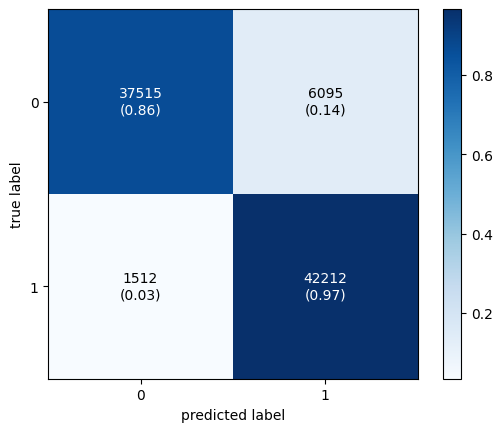

In [26]:
print('Confusion Matrix for Random Forest Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,prediction_rfc)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## **2. Logistic Regression**

In [29]:
# Initializing the model LR 1
model_lr = LogisticRegression()

# fitting the model on the train data
model_lr.fit(X_train, y_train)

# predicting values on test data
prediction_lr = model_lr.predict(X_test)


In [30]:
# create an iterator object with write permission - model1.pkl
with open('lrmodel_pkl', 'wb') as files:
    pickle.dump(model_lr, files)
#/content/model2_pkl

In [ ]:
# Carregar modelo serealizado em uma variável
# load saved model
with open('lrmodel_pkl' , 'rb') as pkl2:
    lr1 = pickle.load(pkl2)

# check prediction
# rfc1.predict([[5000]]) # similar

In [31]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = prediction_lr
pred_df

,True values,Predicted values
165851,1.0,1.0
80473,0.0,0.0
183167,0.0,0.0
231052,1.0,1.0
64551,1.0,1.0
...,...,...
249941,0.0,0.0
49121,0.0,0.0
30156,1.0,0.0
48549,1.0,0.0


In [32]:
# Evaluation

# calculating the accuracy of the model
accuracy_2 = accuracy_score(y_test, prediction_lr)
accuracies['Logistic Regression'] = accuracy_2
# calculating the classification report 
classificationreport = classification_report(y_test, prediction_lr) 

# calculating the mse 
mse = mean_squared_error(y_test, prediction_lr)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression : ' + str(round(accuracy_2*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Logistic Regression : 74.12

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     43610
         1.0       0.73      0.77      0.75     43724

    accuracy                           0.74     87334
   macro avg       0.74      0.74      0.74     87334
weighted avg       0.74      0.74      0.74     87334


**************************************************

Mean squared error : 0.25882245173700963

**************************************************

Root mean squared error : 0.5087459599220515


Confusion Matrix for Logistic Regression


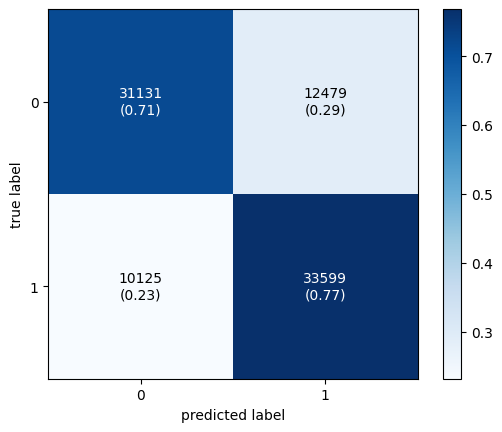

In [33]:
print('Confusion Matrix for Logistic Regression')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,prediction_lr)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## **3. Decision Tree Classifier**

In [ ]:
# Initializing the model DTC1

model_3 = DecisionTreeClassifier(max_depth = 3)

# fitting the model on the train data
model_3.fit(X_train, y_train)

# predicting values on test data
prediction_dtc = model_3.predict(X_test)


In [ ]:
# Salvar modelo serealizado pickle
# loading library
import pickle

# create an iterator object with write permission - model1.pkl
with open('model3_pkl', 'wb') as files:
    pickle.dump(model_3, files)
# /content/model3_pkl

In [ ]:
# Carregar modelo serealizado em uma variável
# load saved model
with open('model3_pkl' , 'rb') as pkl3:
    dtc1 = pickle.load(pkl3)

# check prediction
# rfc1.predict([[5000]]) # similar

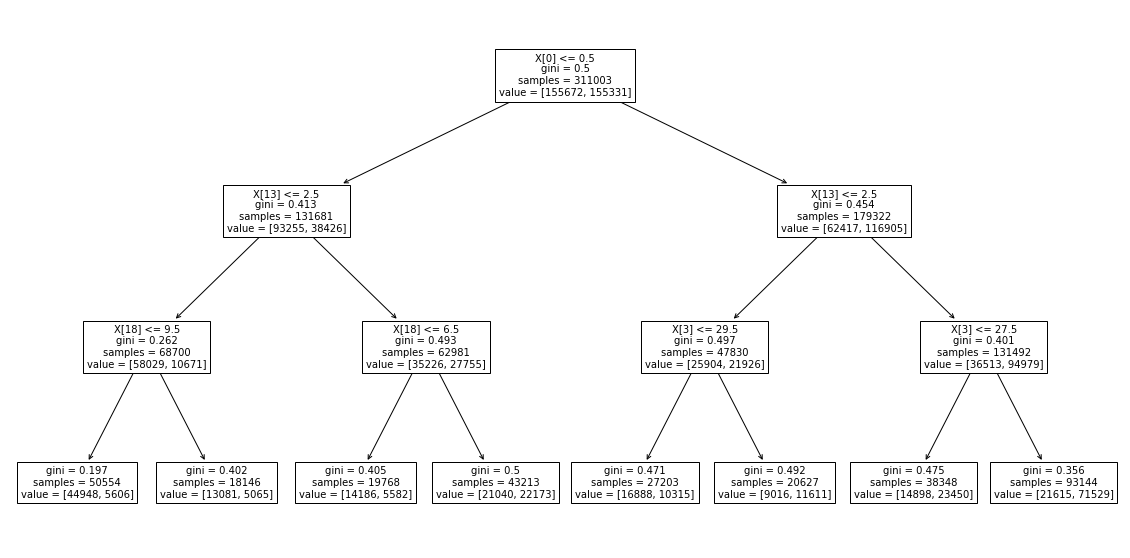

In [ ]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(model_3)
plt.show()

In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = prediction_dtc
pred_df

,True values,Predicted values
73626,0.0,0.0
189400,1.0,1.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,1.0
177484,1.0,1.0
61564,1.0,1.0
233139,1.0,1.0


In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracy_3 = accuracy_score(y_test, prediction_dtc)
accuracies['Decision Tree Classifier'] = accuracy_3

# calculating the classification report 
classificationreport = classification_report(y_test, prediction_dtc) 

# calculating the mse 
mse = mean_squared_error(y_test, prediction_dtc)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Decision Tree Classifier : ' + str(round(accuracy_3*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Decision Tree Classifier : 70.09

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.66     38705
         1.0       0.66      0.83      0.74     39046

    accuracy                           0.70     77751
   macro avg       0.71      0.70      0.70     77751
weighted avg       0.71      0.70      0.70     77751


**************************************************

Mean squared error : 0.2991344162776041

**************************************************

Root mean squared error : 0.5469318205019745


Confusion Matrix for Decision Tree Classifier


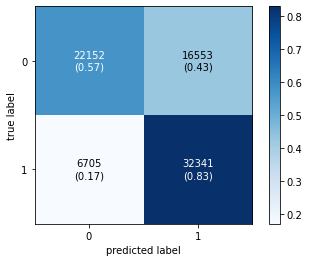

In [ ]:
print('Confusion Matrix for Decision Tree Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,prediction_dtc)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## **4. K – Nearest Neighbor (KNN)**

In [ ]:
# Initializing the model KNN 1

model_4 = KNeighborsClassifier(n_neighbors = 5, p = 2)

# fitting the model on the train data
model_4.fit(X_train, y_train)

# predicting values on test data
prediction_knn = model_4.predict(X_test)

In [ ]:
# Salvar modelo serealizado pickle
# loading library
import pickle

# create an iterator object with write permission - model1.pkl
with open('model4_pkl', 'wb') as files:
    pickle.dump(model_4, files)
    #/content/model4_pkl

In [ ]:
# Carregar modelo serealizado em uma variável
# load saved model
with open('model4_pkl' , 'rb') as pkl4:
    knn1 = pickle.load(pkl4)

# check prediction
# rfc1.predict([[5000]]) # similar

In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = prediction_knn
pred_df

,True values,Predicted values
73626,0.0,0.0
189400,1.0,1.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
177484,1.0,1.0
61564,1.0,1.0
233139,1.0,1.0


In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracy_4 = accuracy_score(y_test, prediction_knn)
accuracies['KNeighborsClassifier'] = accuracy_4

# calculating the classification report 
classificationreport = classification_report(y_test, prediction_knn) 

# calculating the mse 
mse = mean_squared_error(y_test, prediction_knn)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of K - Nearest Neighbors : ' + str(round(accuracy_4*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of K - Nearest Neighbors : 81.96

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.79     38705
         1.0       0.76      0.94      0.84     39046

    accuracy                           0.82     77751
   macro avg       0.84      0.82      0.82     77751
weighted avg       0.84      0.82      0.82     77751


**************************************************

Mean squared error : 0.1803963936155162

**************************************************

Root mean squared error : 0.42473096616036393


Confusion Matrix for K - Nearest Neighbors


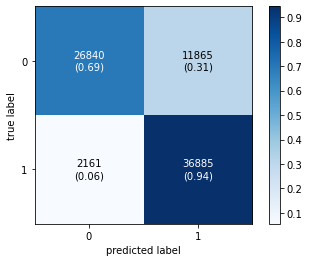

In [ ]:
print('Confusion Matrix for K - Nearest Neighbors')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,prediction_knn)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## **5. SVC**

In [ ]:
X = df_new.iloc[:,:10]
Y = df_new.iloc[:,10]
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import make_pipeline
###
# Scaling the data.
#https://www.kaggle.com/code/theblackmamba31/diabetes-prediction/notebook
# where, μ = mean and 𝛔 = standard deviation
###


# Initializing the model
model_5 = SVC()

#model_5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# fitting the model on the train data
model_5.fit(X_train, y_train)
# print("Test type ", model_5.fit(X_train,y_train))

# predicting values on test data
prediction_svc = model_5.predict(X_test)


In [ ]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = prediction_svc
pred_df

In [ ]:
# Evaluation

# calculating the accuracy of the model
accuracy_5 = accuracy_score(y_test, prediction_svc)
accuracies['SVC - Model'] = accuracy_5

# calculating the classification report 
classificationreport = classification_report(y_test, prediction_svc) 

# calculating the mse 
mse = mean_squared_error(y_test, prediction_svc)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of SVC Model: ' + str(round(accuracy_5*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))

In [ ]:
print('Confusion Matrix for K - Nearest Neighbors')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,prediction_svc)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## **6. AdaBoostClassifier**

## **7. GradientBoostingClassifier**

## **Comparando os modelos**

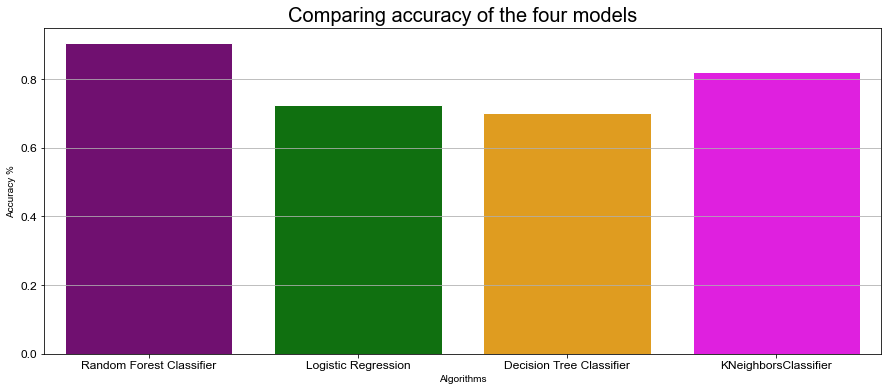

In [ ]:
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [ ]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,Random Forest Classifier,0.904786
3,KNeighborsClassifier,0.819604
1,Logistic Regression,0.725200
2,Decision Tree Classifier,0.700866


In [ ]:
import pickle
randomforest = pickle.load(open('rfcmodel_pkl','rb'))


In [ ]:
'''importância de features
'''

inportance = randomforest.feature_importances_
features = []
for i,fit in enumerate(inportance):
    #print(f'feature: {X_train.columns[i]}, score: {fit:.5f}')
    features.append((fit,X_train.columns[i]))
features.sort()
print(features)
for x,y in reversed(features):
    print(f'feature: {y}, score: {x}')


[(0.00871220461513539, 'CholCheck'), (0.009154668799253727, 'AnyHealthcare'), (0.01078850196610742, 'Stroke'), (0.011413965665242899, 'HvyAlcoholConsump'), (0.013933816232194576, 'NoDocbcCost'), (0.01819401163837908, 'HeartDiseaseorAttack'), (0.02173803730158229, 'PhysActivity'), (0.021995756432731654, 'Veggies'), (0.022759071968702287, 'Sex'), (0.024691524293484743, 'DiffWalk'), (0.025900924012490844, 'Smoker'), (0.02592635190366908, 'Fruits'), (0.03942531681231373, 'HighChol'), (0.05792067230582781, 'Education'), (0.059234832254945406, 'MentHlth'), (0.07267597765332949, 'HighBP'), (0.07588469658046583, 'PhysHlth'), (0.08209223930059051, 'Income'), (0.10211439202627208, 'GenHlth'), (0.1295276843954348, 'Age'), (0.16591535384184625, 'BMI')]
feature: BMI, score: 0.16591535384184625
feature: Age, score: 0.1295276843954348
feature: GenHlth, score: 0.10211439202627208
feature: Income, score: 0.08209223930059051
feature: PhysHlth, score: 0.07588469658046583
feature: HighBP, score: 0.0726759

In [ ]:
'''   
features com maior correlação
'''
cor = df.corr()
cor_target = abs(cor['Diabetes_binary'])
relevantFeatures  = cor_target[cor_target>0.2]
relevantFeatures.index

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk'], dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif 
kBest = SelectKBest(score_func=f_classif, k= 10)
fit = kBest.fit(X_train, y_train)

In [ ]:
'''Melhores Features'''

x_train = X_train.columns[fit.get_support(indices=True)].tolist()
x_train

['HighBP',
 'HighChol',
 'BMI',
 'HeartDiseaseorAttack',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

In [ ]:

# Modeling fonte : https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook

from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

## Separate train dataset and test dataset
features = df_new.drop(['Diabetes_binary'], axis=1)
labels = df_new['Diabetes_binary']

#scaler = StandardScaler()
#standardized_data = scaler.fit_transform(X)

print("Shape of train x: ",X_train.shape)
print("Shape of train y: ",y_train.shape)

print("Shape of test x: ",X_test.shape)
print("Shape of test y: ",y_test.shape)

#
# Cross validate models

def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

    # Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)


Shape of train x:  (349334, 21)
Shape of train y:  (349334, 1)
Shape of test x:  (87334, 21)
Shape of test y:  (87334, 1)


KeyboardInterrupt: ignored

# Summary 
* Used oversampling method for imbalanced classification data.
* **Random Forest Classifier** models performs best fit for our dataset.
* Random Forest Classifer has the lowest **Mean squared error : 0.095 and Root mean squared error : 0.308**

# Análise exploratória

In [34]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [35]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [6]:
df.shape

(253680, 22)

In [7]:
display(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Próximos passos


Implementar código de consulta para dados faltantes 
Modelos para lidar comdados faltantes
Ex KNN

Implementar comitê
Ver liks no whatsapp

